In [41]:
!pip install selenium

In [106]:
# string 형태 input을 넣으면, 정확한 메뉴명 추출해서 list형태로 return
def split_menu(menu):
    menu = menu[13:-11]
    while menu.find('(') != -1:
        start_index = menu.find('(')
        bracket_count = 1
        index_itr = start_index
        while bracket_count != 0:
            index_itr += 1
            if menu[index_itr] == '(':
                bracket_count += 1
            elif menu[index_itr] == ')':
                bracket_count -= 1
        end_index = index_itr
        menu = menu[:start_index] + menu[end_index:]
    while menu.find('（') != -1:
        start_index = menu.find('（')
        bracket_count = 1
        index_itr = start_index
        while bracket_count != 0:
            index_itr += 1
            if menu[index_itr] == '（':
                bracket_count += 1
            elif menu[index_itr] == '）':
                bracket_count -= 1
        end_index = index_itr
        menu = menu[:start_index] + menu[end_index:]
    menu = menu.split(',')
    for i in range(len(menu)):
        menu[i] = menu[i].split('/')[0]
    return menu

In [27]:
# list 형태 input을 넣으면, 각 메뉴별 주문량 카운팅
# return 하지않고 전역변수 split_menu_dict={}에 저장
# [주문량, 토탈별점, 맛별점, 양별점, 배달별점]
def dict_menu(input):
    
    for i in range(len(input)):
        if input[i] not in split_menu_dict:
            
            split_menu_dict[input[i]]=[0,0,0,0,0]
            
            split_menu_dict[input[i]][0]=1
            
            split_menu_dict[input[i]][1]=total_score
            split_menu_dict[input[i]][2]=taste_score
            split_menu_dict[input[i]][3]=quantity_score
            split_menu_dict[input[i]][3]=delivery_score
        
        else:
            split_menu_dict[input[i]][0]=split_menu_dict[input[i]][0]+1
            
            split_menu_dict[input[i]][1]=split_menu_dict[input[i]][1]+total_score
            split_menu_dict[input[i]][2]=split_menu_dict[input[i]][2]+taste_score
            split_menu_dict[input[i]][3]=split_menu_dict[input[i]][3]+quantity_score
            split_menu_dict[input[i]][4]=split_menu_dict[input[i]][4]+delivery_scorel
    return


In [124]:
from selenium import webdriver

url = 'https://www.yogiyo.co.kr/mobile/#/291986/'

driver = webdriver.Chrome("C:/users/student/Downloads/chromedriver_win32/chromedriver.exe")
driver.get(url)
time.sleep(3)

click_point = driver.find_element_by_xpath('/html/body/div[6]/div[2]/div[1]/ul/li[2]/a')

driver.execute_script("arguments[0].click();", click_point)

 #댓글 더보기
#for i in range(12, 993, 10):
#    click_point = driver.find_element_by_xpath('//*[@id="review"]/li[' + str(i) + ']/a/span')
#    driver.execute_script("arguments[0].click();", click_point)
#    time.sleep(2)
#    print(" {0}개 리뷰 가져오기 성공(최근 리뷰 가져오는 중)".format(i))

print("최근 리뷰 가져오기 성공\n")


source = driver.page_source
soup = BeautifulSoup(source, 'html.parser')




--------------최근 리뷰 가져오기 성공--------------



메뉴명 추출 및 주문량, 별점 데이터 저장 시작
메뉴명 추출 및 주문량, 별점 데이터 저장 완료
주문량 내림차순 정렬 완료
그래프 생성 시작


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9415 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9415 missing from current font.
  font.set_text(s, 0, flags=flags)


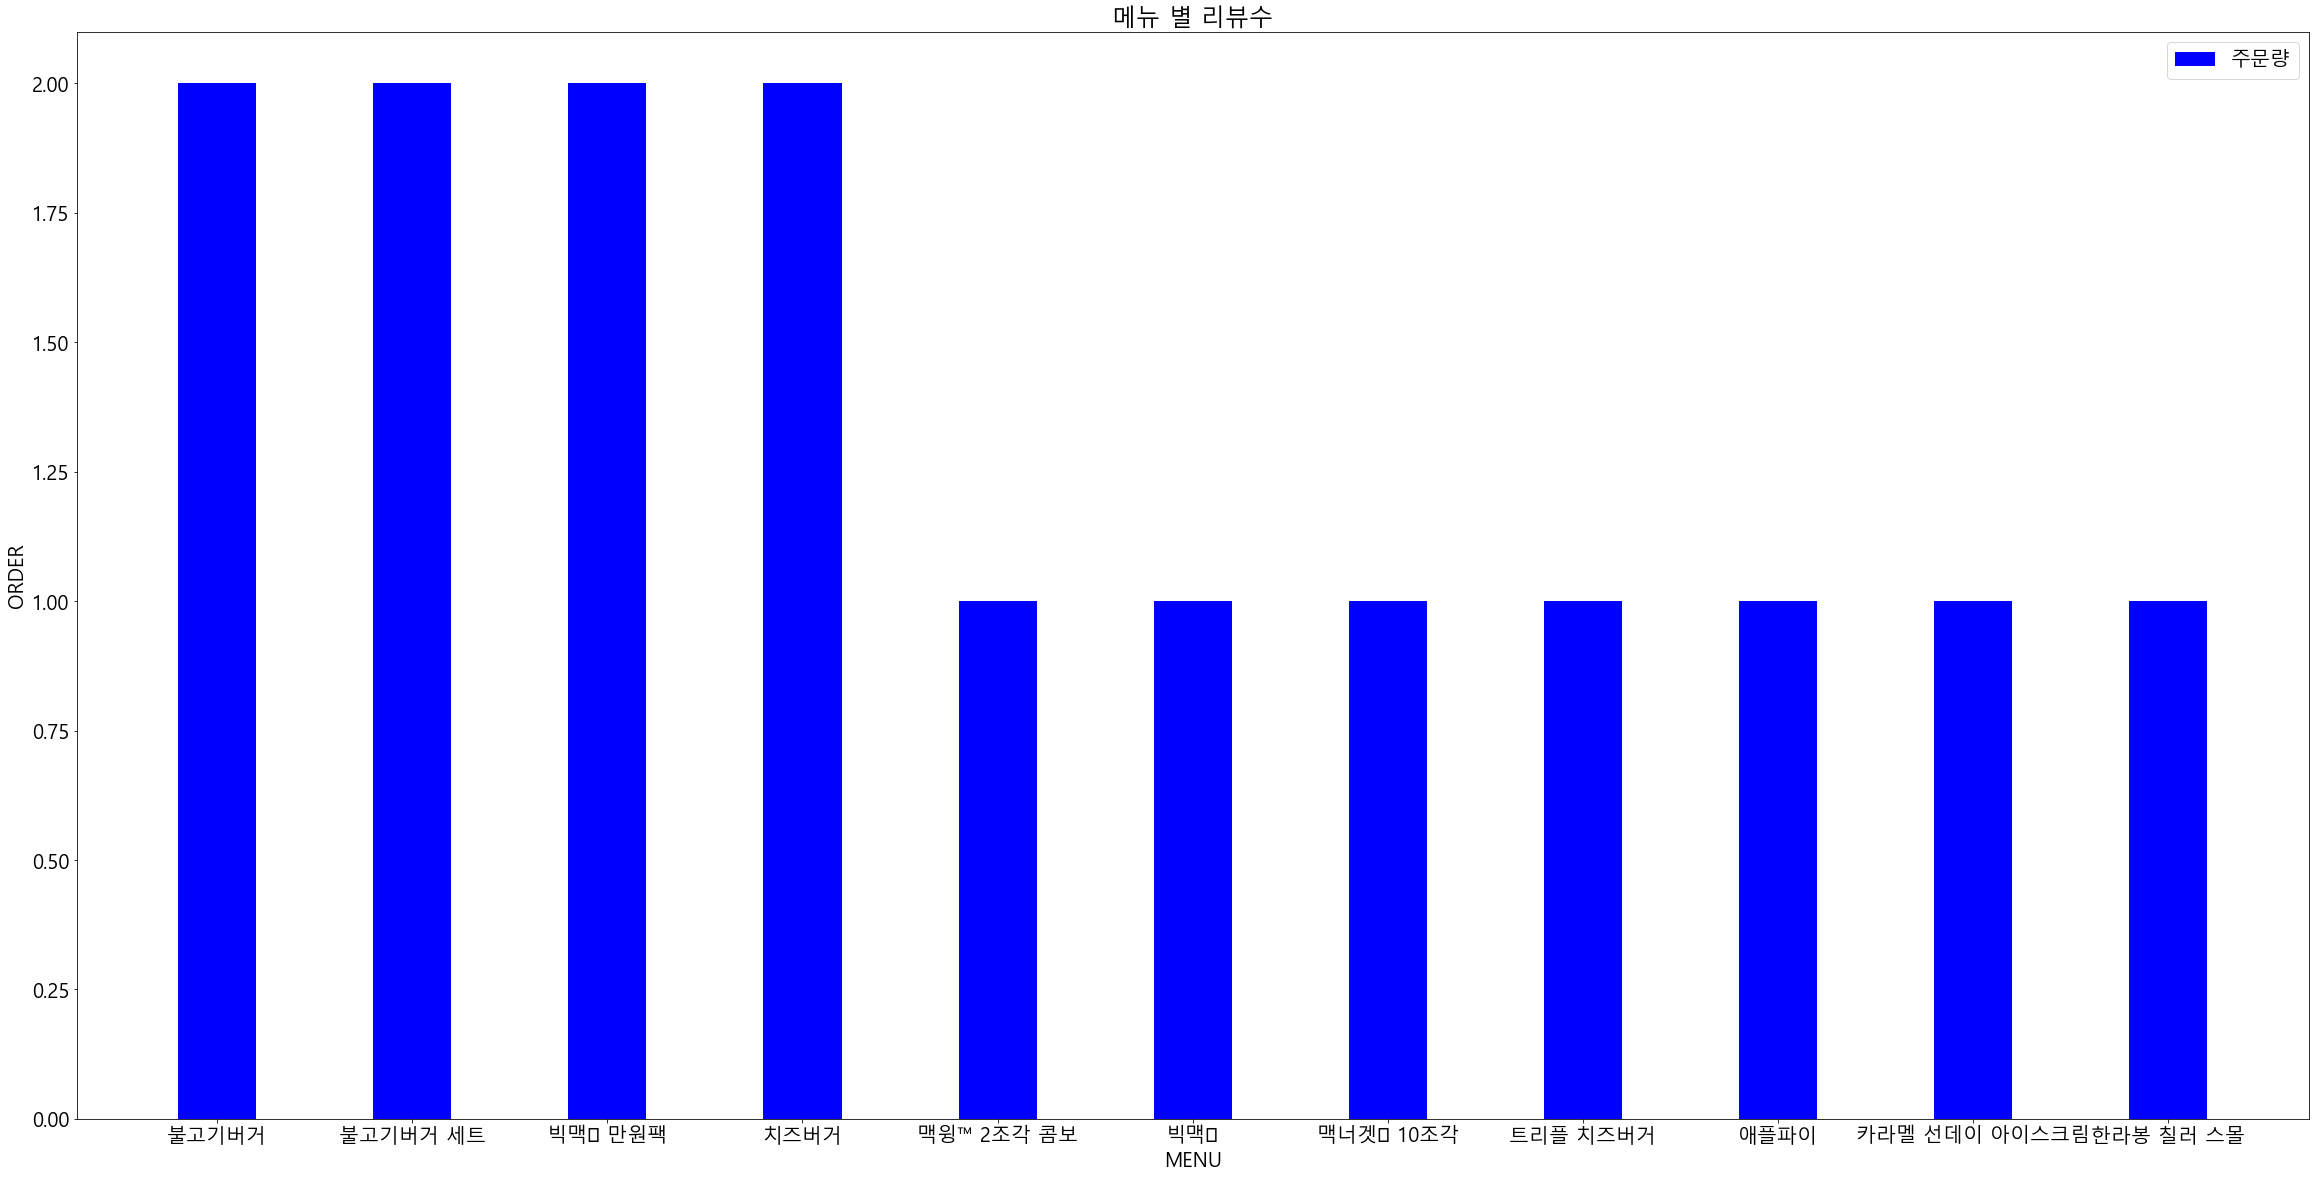

In [125]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import time
import operator
import re
import matplotlib
import matplotlib.pyplot as plt


split_menu_dict={} # 전역변수 초기화
total_score_dict={}
taste_score_dict={}
quantity_score_dict={}
delivery_score_dict={}

print("메뉴명 추출 및 주문량, 별점 데이터 저장 시작\n")
for entry in soup.findAll('li', class_ = 'list-group-item star-point ng-scope'):
    #person = entry.find('span', class_ = 'review-id ng-binding').text
    menu = entry.find('div', class_ = 'order-items default ng-binding').text
    #comment = entry.find('p', class_ = 'ng-binding').text
    taste_score = int(entry.find('span', {'class' : 'points ng-binding', 'ng-show' : 'review.rating_taste > 0'}).text)
    quantity_score = int(entry.find('span', {'class' : 'points ng-binding', 'ng-show' : 'review.rating_quantity > 0'}).text)
    delivery_score = int(entry.find('span', {'class' : 'points ng-binding', 'ng-show' : 'review.rating_delivery > 0'}).text)
    total_score = len(entry.findAll('span', class_ = 'full ng-scope'))

    #print('Reviewer: ', person)
    #print('Menu: ', menu)
    #print('Comment', comment)
    #print('Total:', total_score, '\tTaste:', taste_score, '\tQuantity:', quantity_score, '\tDelivery:', delivery_score)
    #print('\n\n\n\n')
    
    #메뉴 string에서 메뉴이름만 list에 저장
    output_list=split_menu(menu)
    
    #print(output_list)   
    #print("---------------------------------------------------------------------------------")

    # list에 저장한 메뉴 주문량 카운팅하고 내림차순 정렬해서 return
   
    # dict에 저장된 메뉴별 주문량을 dict형태에 저장
    dict_menu(output_list)
    

print("메뉴명 추출 및 주문량, 별점 데이터 저장 완료\n")

# 주문량 기준 내림차순 정렬
output_dict_sorted=sorted(split_menu_dict.items(), key=operator.itemgetter(1), reverse=True)
print("주문량 내림차순 정렬 완료\n") 

menu=[]
# 메뉴, 주문수, 토탈별점, 맛 별점, 양 별점, 배달별점,

for i in range(len(output_dict_sorted)):
    v=list(output_dict_sorted[i][1])
    menu.append([output_dict_sorted[i][0], v[0],v[1],v[2],v[3],v[4]])

print("그래프 생성 시작\n")

matplotlib.rcParams['font.family']='Malgun Gothic' # 한글패치

dataframe=pd.DataFrame(menu)
#dataframe.to_csv('c:/python/menu_order_Mac_list.csv',header=False, index=False,encoding='utf-8-sig')

dataframe.columns=['메뉴','주문량','total_sum','taste_sum','quantity_sum','delivery_sum']

part_menu=dataframe.loc[0:9] # 상위 10개 메뉴정보 따로 저장


MENU=part_menu['메뉴']
ORDER=part_menu['주문량']

index=np.arange(len(MENU))
plt.bar(index,ORDER,color='b',tick_label=MENU,width=0.4,label='주문량')
# color인쓰면 에러, 순서 유관

plt.legend()

plt.xlabel('MENU') # 축 설명
plt.ylabel('ORDER')
plt.title('메뉴 별 리뷰수')

plt.rcParams["figure.figsize"] = (40,20)
plt.rc('font',size=20)

plt.show()
       

In [118]:
driver.close() # 크롬창 닫고싶을때 실행